In [1]:
import symforce 

# dont know how these two lines impact 
symforce.set_symbolic_api("sympy")
symforce.set_log_level("warning")

import symforce.symbolic as sf
from symforce.values import Values
from symforce.notebook_util import display, display_code, display_code_file

In [2]:
inputs = Values(
    x=sf.Symbol("x"),
    y=sf.Rot2.symbolic("c"),
)
display(inputs)

Values(
  x: x,
  y: <Rot2 <C real=c_re, imag=c_im>>,
)

In [4]:
inputs.add(sf.Symbol("hel"))
display(inputs)

Values(
  x: x,
  y: <Rot2 <C real=c_re, imag=c_im>>,
  foo: foo,
  hel: hel,
)

In [5]:
x, y = sf.symbols("x y")
expr = x ** 2 + sf.sin(y) / x ** 2
inputs["states"] = Values(p=expr)
display(inputs)

Values(
  x: x,
  y: <Rot2 <C real=c_re, imag=c_im>>,
  foo: foo,
  hel: hel,
  states:   Values(
    p: x**2 + sin(y)/x**2,
  ),
)

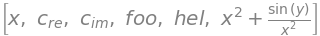

In [6]:
display(inputs.to_storage())


In [7]:
display(inputs.items_recursive())

[('x', x),
 ('y', <Rot2 <C real=c_re, imag=c_im>>),
 ('foo', foo),
 ('hel', hel),
 ('states.p', x**2 + sin(y)/x**2)]

In [8]:
display(inputs.keys_recursive())
display(inputs.values_recursive())

['x', 'y', 'foo', 'hel', 'states.p']

[x, <Rot2 <C real=c_re, imag=c_im>>, foo, hel, x**2 + sin(y)/x**2]

In [9]:
index = inputs.index()
index

OrderedDict([('x',
  IndexEntry(offset=0, storage_dim=1, _module='builtins', _qualname='float', shape=None, item_index=None)),
 ('y',
  IndexEntry(offset=1, storage_dim=2, _module='symforce.geo.rot2', _qualname='Rot2', shape=None, item_index=None)),
 ('foo',
  IndexEntry(offset=3, storage_dim=1, _module='builtins', _qualname='float', shape=None, item_index=None)),
 ('hel',
  IndexEntry(offset=4, storage_dim=1, _module='builtins', _qualname='float', shape=None, item_index=None)),
 ('states',
  IndexEntry(offset=5, storage_dim=1, _module='symforce.values.values', _qualname='Values', shape=None, item_index=OrderedDict([('p', IndexEntry(offset=0, storage_dim=1, _module='builtins', _qualname='float', shape=None, item_index=None))])))])

In [10]:
inputs2 = Values.from_storage_index(inputs.to_storage(), index)
assert inputs == inputs2
display(inputs)

Values(
  x: x,
  y: <Rot2 <C real=c_re, imag=c_im>>,
  foo: foo,
  hel: hel,
  states:   Values(
    p: x**2 + sin(y)/x**2,
  ),
)

In [11]:
with sf.scope("params"):
    s = sf.Symbol("cost")
display(s)

In [20]:
q = sf.V3.symbolic("q")
display(q)

⎡q₀⎤
⎢  ⎥
⎢q₁⎥
⎢  ⎥
⎣q₂⎦

In [28]:
continuous_time_dynamics = sf.V2([q[1], q[2]])
display(continuous_time_dynamics)

⎡q₁⎤
⎢  ⎥
⎣q₂⎦

In [22]:
state = sf.V2([q[0], q[1]])

In [24]:
u = sf.V1(q[2])

In [25]:
A = continuous_time_dynamics.jacobian(state)
B = continuous_time_dynamics.jacobian(u)

In [27]:
output = Values(qdot = sf.V2(A*state + B*u))

⎡0⎤
⎢ ⎥
⎣1⎦

In [ ]:
discrete_time_dynamics = codegen.Codegen(
    inputs=inputs,
    outputs=outputs,
    config=codegen.CppConfig(),
    name="double_pendulum",
    return_key="ddang",
)
discrete_time_dynamics_data = discrete_time_dynamics.generate_function()

# Print what we generated
print("Files generated in {}:\n".format(discrete_time_dynamics_data.output_dir))
for f in discrete_time_dynamics_data.generated_files:
    print("  |- {}".format(os.path.relpath(f, discrete_time_dynamics_data.output_dir)))